In [1]:
############# setting librabries

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
import os
import pandas as pd
%matplotlib inline

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] =14
matplotlib.rcParams['figure.figsize'] =(10,6)
matplotlib.rcParams['figure.facecolor'] ='#000000'





In [2]:
############3 downloading and loading
# from kaggle.api.kaggle_api_extended import KaggleApi

# api = KaggleApi()
# api.authenticate()

# dataset_url = 'jsphyg/weather-dataset-rattle-package'
# data_dir = 'weather-dataset-rattle-package'
# api.dataset_download_files(dataset_url, path=data_dir, unzip=True)

raw_df=pd.read_csv('weatherAUS.csv')
raw_df.info()

# if 'Date' in raw_df.columns:
#     raw_df['Date'] = pd.to_datetime(raw_df['Date'])

raw_df=raw_df.dropna(subset=['RainTomorrow'])
print(raw_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

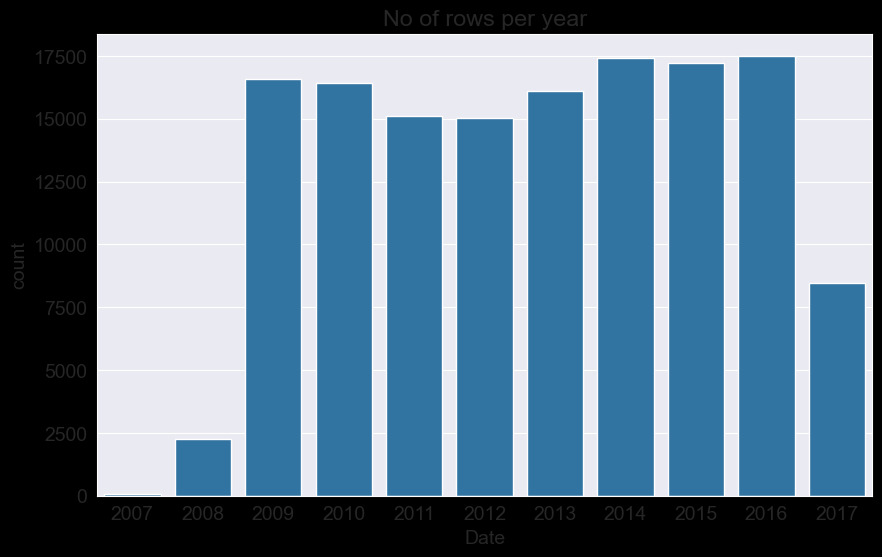

In [3]:
# if 'Date' in raw_df.columns:
#     raw_df['Date'] = pd.to_datetime(raw_df['Date'])
    
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)
plt.title("No of rows per year")
plt.show()

In [4]:
year=pd.to_datetime(raw_df.Date).dt.year
train_df=raw_df[year<2015]
val_df=raw_df[year==2015]
test_df=raw_df[year>2015]

print("Train data shape: ",train_df.shape)
print("Validation data shape: ",val_df.shape)
print("Test data shape: ",test_df.shape)



Train data shape:  (98988, 23)
Validation data shape:  (17231, 23)
Test data shape:  (25974, 23)


In [5]:

input_cols=list(train_df.columns[1:-1])
target_cols='RainTomorrow'

train_inputs=train_df[input_cols].copy()
train_targets=train_df[target_cols].copy()

val_inputs=val_df[input_cols].copy()
val_targets=val_df[target_cols].copy()

test_inputs=test_df[input_cols].copy()
test_targets=test_df[target_cols].copy()


numeric_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols=train_inputs.select_dtypes(include='object').columns.tolist()
print(numeric_cols)
print(categorical_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [6]:
############## imputting missing values
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median').fit(raw_df[numeric_cols])

train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])

test_inputs[numeric_cols].isna().sum()

train_df[categorical_cols]=train_df[categorical_cols].fillna('Unknown')
test_df[categorical_cols]=test_df[categorical_cols].fillna('Unknown')
val_df[categorical_cols]=val_df[categorical_cols].fillna('Unknown')



C:\Users\Ayush\AppData\Local\Temp\ipykernel_6652\1488270100.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[categorical_cols]=train_df[categorical_cols].fillna('Unknown')
C:\Users\Ayush\AppData\Local\Temp\ipykernel_6652\1488270100.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[categorical_cols]=test_df[categorical_cols].fillna('Unknown')
C:\Users\Ayush\AppData\Local\Temp\ipykernel_6652\1488270100.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [7]:
########## Scaling numeric columns
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(raw_df[numeric_cols])

train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])

val_inputs.describe().loc[['min','max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.007075,0.030246,0.000000,0.000000,0.0,0.007752,0.000000,0.000000,0.04,0.0,0.125620,0.0816,0.000000,0.000000,0.021097,0.026871
max,0.952830,0.948960,0.666307,0.485517,1.0,1.000000,0.669231,0.850575,1.00,1.0,0.971901,0.9632,0.888889,0.888889,0.943038,0.925144


In [ ]:
########## Encodin Categorical data

from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(raw_df[categorical_cols])
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))

train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols]=encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_cols])


x_train=train_inputs[numeric_cols+encoded_cols]
x_val=val_inputs[numeric_cols+encoded_cols]
x_test=test_inputs[numeric_cols+encoded_cols]